HR Analytics

STEP 1:- IMPORT LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

STEP 2 :- LOAD DATASET

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv", encoding='ISO-8859-1')
print(df.head())
print(df.info())

   Ã¯Â»Â¿Age Attrition     BusinessTravel  DailyRate              Department  \
0         41       Yes      Travel_Rarely       1102                   Sales   
1         49        No  Travel_Frequently        279  Research & Development   
2         37       Yes      Travel_Rarely       1373  Research & Development   
3         33        No  Travel_Frequently       1392  Research & Development   
4         27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction Stand

STEP 3:- DATA CLEANING

In [4]:
# Check for missing or duplicate values
print(df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Optional: rename columns for readability
df.rename(columns={'Ã¯Â»Â¿Age': 'Age','JobSatisfaction': 'Job_Satisfaction', 'WorkLifeBalance': 'Work_Life_Balance'}, inplace=True)




Ã¯Â»Â¿Age                   0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

STEP 4:- EXPLORATORY DATA ANALYSIS

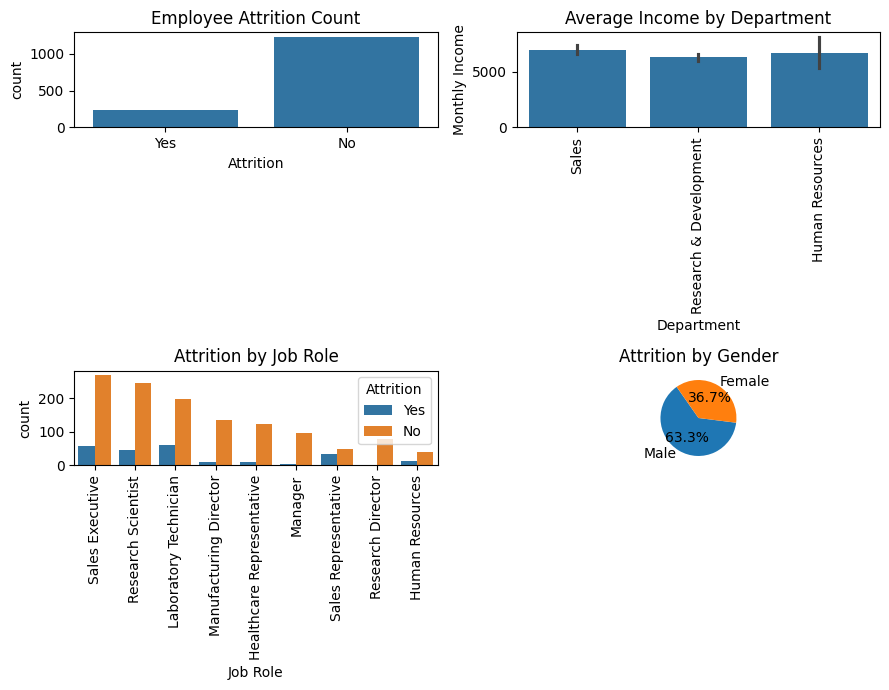

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(9,7))

# --- (1,1) Employee Attrition Count ---
sns.countplot(x='Attrition', data=df, ax=ax[0,0])
ax[0,0].set_title("Employee Attrition Count")

# --- (1,2) Average Income by Department ---
sns.barplot(x='Department', y='MonthlyIncome', data=df, ax=ax[0,1])
ax[0,1].set_title("Average Income by Department")
ax[0,1].set_xlabel('Department')
ax[0,1].set_ylabel('Monthly Income')
ax[0,1].tick_params(axis='x', rotation=90) 

# --- (2,1) Attrition by Job Role ---
sns.countplot(x='JobRole', hue='Attrition', data=df, ax=ax[1,0])
ax[1,0].set_title("Attrition by Job Role")
ax[1,0].set_xlabel('Job Role')
ax[1,0].tick_params(axis='x', rotation=90)  # rotate x-labels for better visibility

# --- (2,2) Attrition by Gender (Pie Chart) ---
attrition_gender = df[df['Attrition'] == 'Yes']['Gender'].value_counts()
ax[1,1].pie(attrition_gender, labels=attrition_gender.index, autopct='%1.1f%%', startangle=125)
ax[1,1].set_title("Attrition by Gender")

# Adjust layout for clean spacing
plt.tight_layout()
plt.show()



STEP 5:- SAVE CLEAN DATA

In [6]:
df.to_excel("Output.xlsx", index=False)
print("✅ Cleaned dataset exported to 'Output.xlsx'")

✅ Cleaned dataset exported to 'Output.xlsx'


STEP 6:- SUMMARY

In [7]:
print("Total Employees:", len(df))
print("Attrition Count:", df['Attrition'].value_counts())
print("Departments:", df['Department'].unique())
print("Average Monthly Income:", df['MonthlyIncome'].mean())

Total Employees: 1470
Attrition Count: Attrition
No     1233
Yes     237
Name: count, dtype: int64
Departments: ['Sales' 'Research & Development' 'Human Resources']
Average Monthly Income: 6502.931292517007
